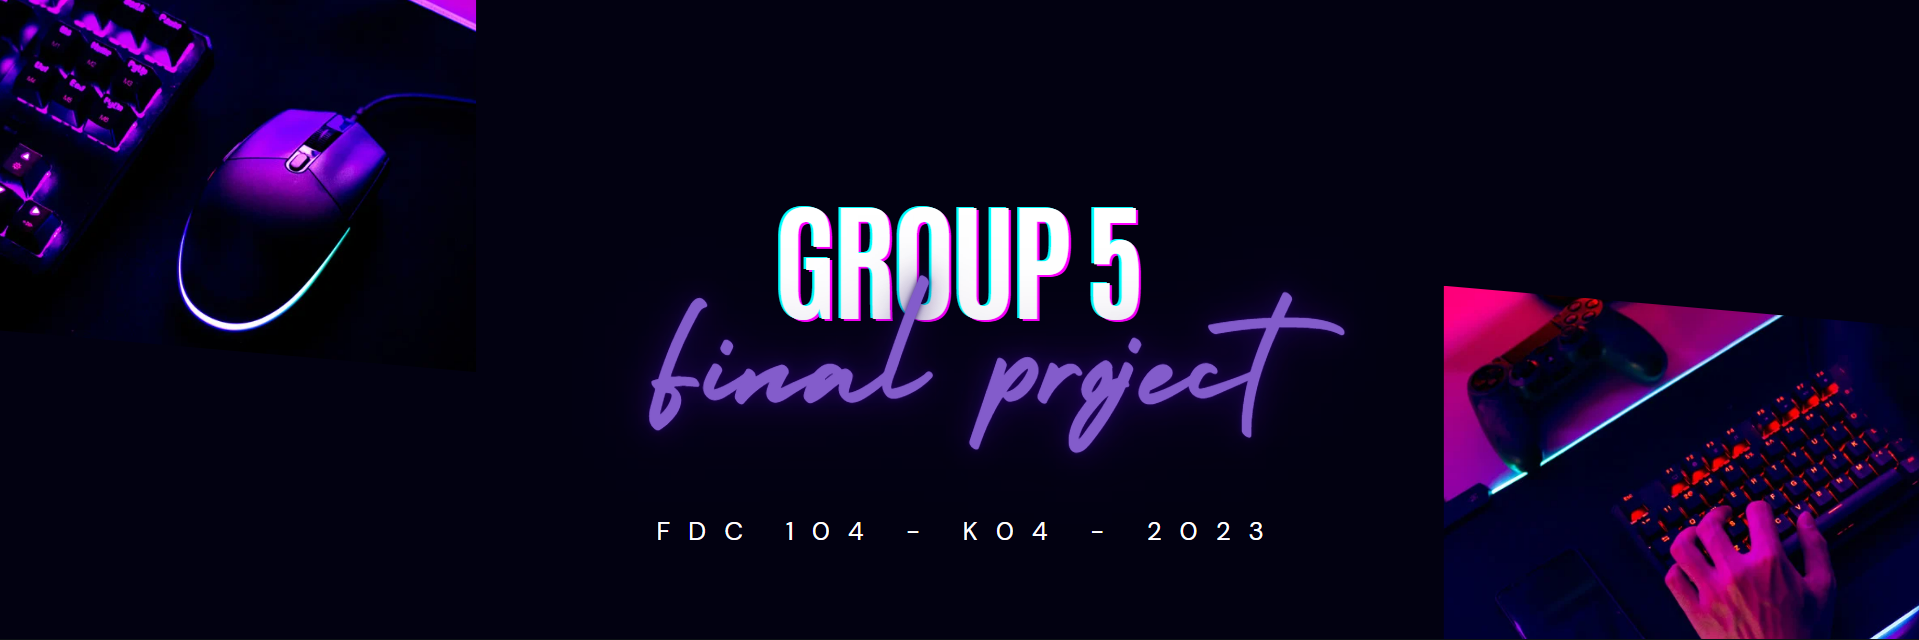


# **Data description**

Ngày nay, dịch vụ xe đạp cho thuê được giới thiệu ở nhiều thành phố đô thị để tăng cường sự thoải mái khi di chuyển. Điều quan trọng là phải cung cấp dịch vụ cho thuê xe đạp cho công chúng vào đúng thời điểm vì nó giúp giảm thời gian chờ đợi. Cuối cùng, việc cung cấp cho thành phố nguồn cung cấp xe đạp cho thuê ổn định trở thành mối quan tâm chính. Phần quan trọng là dự đoán số lượng xe đạp cần thiết mỗi giờ để có nguồn cung cấp xe đạp cho thuê ổn định.
Bộ dữ liệu chứa thông tin liên quan đến thời tiết (Nhiệt độ, Độ ẩm, Tốc độ gió, Tầm nhìn, Điểm sương, Bức xạ mặt trời, Lượng tuyết rơi, Lượng mưa), số lượng xe đạp được thuê mỗi giờ và thông tin ngày tháng.

📌Attribute Information:

* 📆  Date : year-month-day
* 🚲  Rented Bike count - Count of bikes rented at each hour (output attribute)
* 🕒  Hour - Hour of he day
* 🌡  Temperature-Temperature in Celsius
* 💧  Humidity - %
* 🌬️  Windspeed - m/s
* 👁️  Visibility - 10m
* 🌫️  Dew point temperature - Celsius
* ☀️  Solar radiation - MJ/m2
* 🌧️  Rainfall - mm
* ❄️  Snowfall - cm
* 🌸  Seasons - Winter, Spring, Summer, Autumn
* ⛱️  Holiday - Holiday/No holiday
* 🏬  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

📌Nhiệm vụ: Tạo mô hình đơn giản dự báo số lượng xe đạp được thuê



# **Data cleaning**

## **Importing**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
url = "https://github.com/trangmx/fdc104/raw/main/datasets/bike_sharing/Bike_sharing_data.csv"
columns = ['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day']
df = pd.read_csv(url, encoding='latin-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Các kiểu dữ liệu cho từng biến phù hợp

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Sau khi chạy phương thức isnull, nhóm nhận thấy dữ liệu không chứa dữ liệu NULL.

## **Formatting**



In [ ]:
bike_sharing = df.copy()

**`Đầu tiên`**, nhóm chuyển định dạng của Date theo format: Năm-Tháng-Ngày

In [ ]:
bike_sharing['Date']= pd.to_datetime(bike_sharing['Date'], format='%d/%m/%Y')
bike_sharing

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Tiếp theo**, chúng mình thực hiện chuyển các biến categorical về các biến numeric bằng cách sử dụng phương thức getdummies:

In [ ]:
dummy_variable_1 = pd.get_dummies(bike_sharing['Seasons'])
bike_sharing = pd.concat([bike_sharing, dummy_variable_1], axis=1)
bike_sharing.drop("Seasons", axis = 1, inplace=True)

In [ ]:
dummy_variable_2 = pd.get_dummies(bike_sharing["Holiday"])
bike_sharing = pd.concat([bike_sharing, dummy_variable_2], axis=1)
bike_sharing.drop("Holiday", axis = 1, inplace=True)

In [ ]:
dummy_variable_3 = pd.get_dummies(bike_sharing["Functioning Day"])
dummy_variable_3.rename(columns={'Yes':'Func', 'No':'NoFunc'}, inplace=True)
bike_sharing = pd.concat([bike_sharing, dummy_variable_3], axis=1)
bike_sharing.drop("Functioning Day", axis = 1, inplace=True)

# **Exploratory Data Analysis (EDA)**

## **Correlation**

Tại phần này nhóm mô tả correlation (tương quan) giữa các biến và sử dụng các biểu đồ để khai phá dữ liệu (EDA)

In [ ]:
bike_sharing

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,1,0,1


Do dự đoán biến Rented Bike Count nên lọc ra correlation của biến này

In [ ]:
#tính corr của các biến với biến số xe đạp đã thuê
bike_sharing.corr()['Rented Bike Count'].to_frame().style.background_gradient(cmap='RdPu').format(precision=2)

,Rented Bike Count
Rented Bike Count,1.00
Hour,0.41
Temperature(°C),0.54
Humidity(%),-0.20
Wind speed (m/s),0.12
Visibility (10m),0.20
Dew point temperature(°C),0.38
Solar Radiation (MJ/m2),0.26
Rainfall(mm),-0.12
Snowfall (cm),-0.14


Nhận thấy rằng biến nhiệt độ có correlation với biến số xe đạp được thuê khá tốt (0.54). Điều này cho thấy, biến Temperature có mối quan hệ mạnh với biến Rented Bike Count.

**Tiếp theo**, Dùng heatmap để có một sự đánh giá trực quan tốt hơn

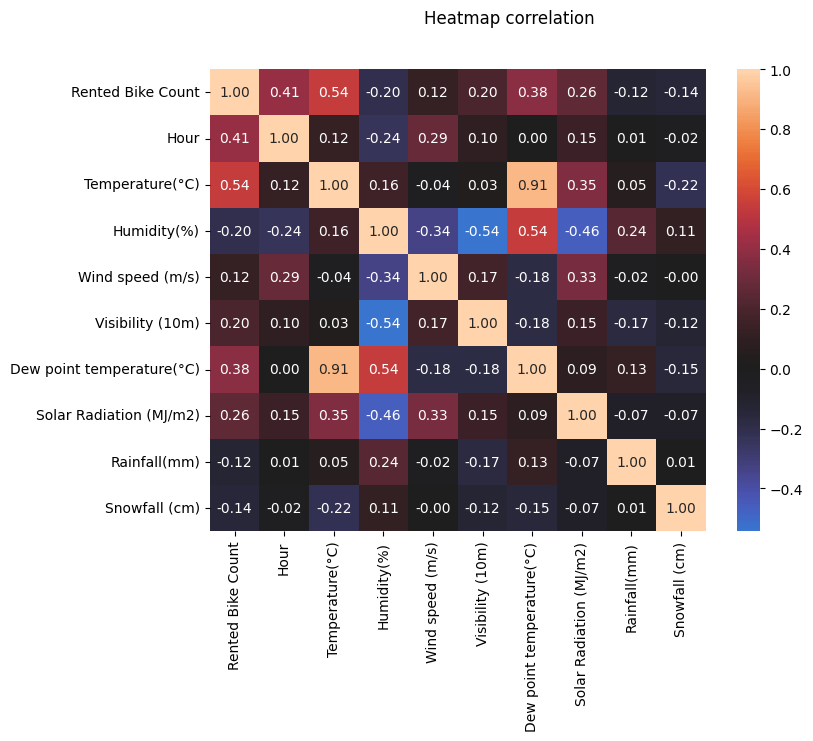

In [ ]:
#heatmap corr
corr=bike_sharing.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, fmt=".2f", center=0, cmap="icefire")
plt.suptitle('Heatmap correlation')
plt.show()

Nếu một biến trong đo lường có hệ số tương quan >=0.3 thì biến đó đạt yêu cầu (Nunnally & Bernstein, 1994).

Lọc correlation **>=0.3 hoặc <=-0.3** để thể hiện các biến có tương quan khá chặt chẽ

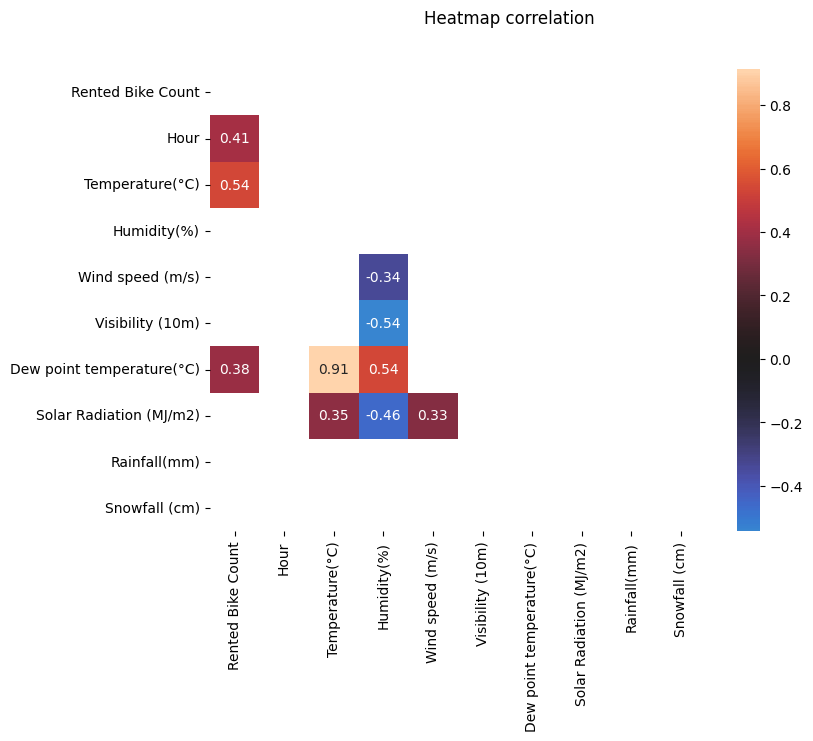

In [ ]:
#heatmap corr đã lọc
plt.figure(figsize=(8,6))
sns.heatmap((corr[(corr>=0.3) |(corr <=-0.3)]), mask=np.triu(corr),annot=True,center = 0,cmap="icefire")
plt.suptitle('Heatmap correlation')
plt.show()

**Comment:** Hầu hết các biến có correlation nhỏ chứng tỏ các biến ít ảnh hưởng với nhau theo mối quan hệ tuyến tính

Ngoại trừ có biến nhiệt độ có tương quan tuyến tính khá chặt chẽ tới số lượng xe đạp được thuê (0.54)

Text(0.5, 1.0, 'Rented Bike Count of Temperature')

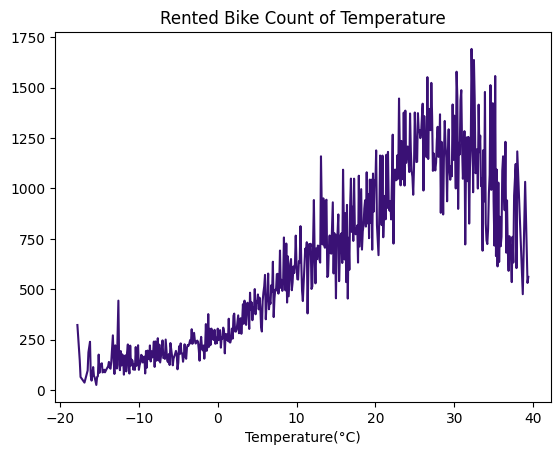

In [ ]:
groupby_temperature=bike_sharing.copy()
groupby_temperature.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot.line(color='#3A1175')
plt.title('Rented Bike Count of Temperature')

**Comment:** số lượng xe được thuê tăng khi nhiệt độ tăng đạt đỉnh ở khoảng 25-30 độ C.

Nhóm nhận định rằng đây là mức nhiệt độ dễ chịu và mát mẻ nên mọi người có xu hướng thuê xe đạp cao và mong muốn thỏa mãn nhu cầu đi dạo, đi chơi...

**Tuy nhiên** , khi nhiệt độ quá cao (30-40 độ C) thì lượng thuê xe đạp giảm do thời tiết quá nóng và mọi người không có nhu cầu ra ngoài

## **Descriptive Statistics**

In [ ]:
#mô tả các biến của data
bike_sharing.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.249315,0.252055,0.252055,0.246575,0.950685,0.033676,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.432641,0.434217,0.434217,0.431042,0.216537,0.180404,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Comment:** 3 biến **Solar Radiation, Rainfall, Snowfall** có mean thấp, 25%, 50% gần như sấp xỉ không.

Điều này chứng tỏ rằng dữ liệu được lấy từ khu vực có thời tiết khá tốt: bức xạ mặt trời (không nắng gắt), mưa và tuyết bằng 0 hoặc sấp xỉ bằng không (mức độ nhẹ).

Nhiệt độ trung bình khoảng 13 độ C có thể dữ liệu được lấy từ vùng có khí hậu ôn hòa

Để tìm hiểu rõ hơn về điều này chúng ta cần tìm hiểu về số lượng từng biến

In [ ]:
bike_sharing['Snowfall (cm)'].value_counts().head(10).to_frame()

,Snowfall (cm)
0.0,8317
0.3,42
1.0,39
0.9,34
0.5,34
0.7,31
0.8,22
2.0,22
0.4,21
1.6,19


In [ ]:

bike_sharing[['Solar Radiation (MJ/m2)']].value_counts().to_frame()

,0
Solar Radiation (MJ/m2),
0.00,4300
0.01,128
0.02,82
0.03,69
0.06,61
...,...
3.38,1
2.97,1
3.44,1


In [ ]:

bike_sharing[[ 'Rainfall(mm)']].value_counts().to_frame()

,0
Rainfall(mm),
0.0,8232
0.5,116
1.0,66
1.5,56
0.1,46
...,...
2.4,1
1.3,1
1.9,1


**Comment**: Có thể thấy rằng rõ ràng rằng hơn 90% dữ liệu là không mưa, không có tuyết rơi và 50% dữ liệu là trời không nắng, nếu có nắng thì lượng bức xạ cũng ở mức độ nhẹ. Chứng tỏ rõ ràng rằng thời thiết ở khu vực này dễ chịu và ít có thời tiết xấu bất thường xảy ra

**Tiếp theo,** nhóm sử dụng biểu đồ cột kết hợp line để biểu thị phân bổ số lượng của từng biến. Qua đó có được một góc nhìn tổng quan về từng biến trong bộ dữ liệu

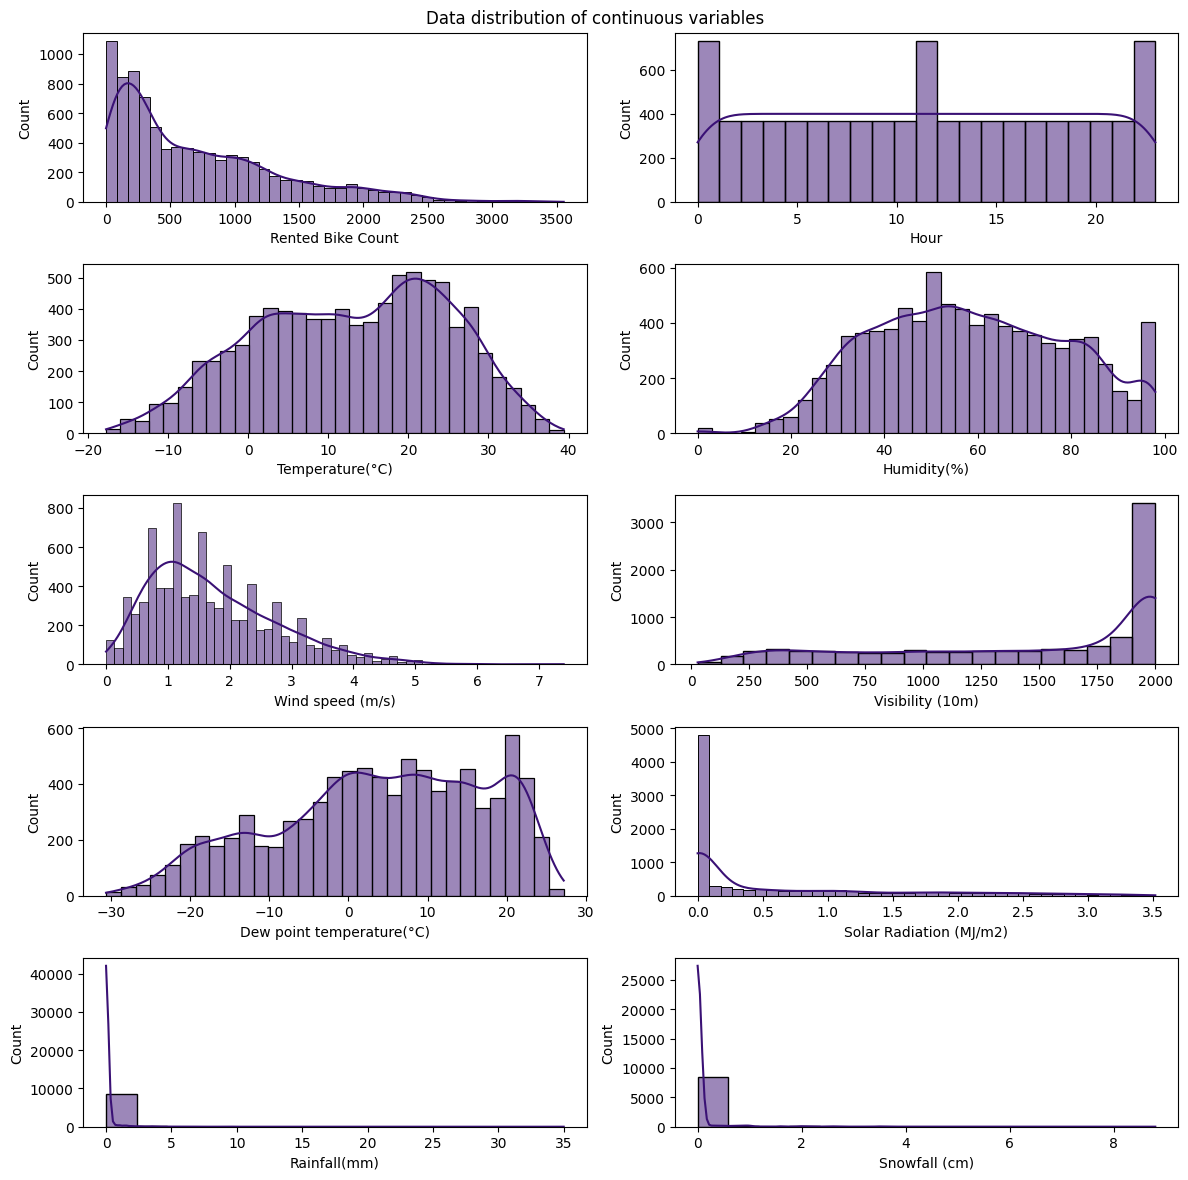

In [ ]:
#count từng biến
plt.figure(figsize=(12, 12))
for i, col in enumerate(bike_sharing.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=bike_sharing, x=col, ax=ax,color='#3A1175',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

**Comment:** Tổng quan dữ liệu thấy được rằng nhiệt độ của khu vực thu nhập dữ liệu vào 20 độ C, độ ẩm trung bình khoảng 40-80%, tốc độ gió trung bình khoảng 1m/s.
Solar Radiation rất thấp thấy được rằng khu vực này không có nhiều ngày nắng mạnh
Rainfall, Snowfall gần như bằng 0 chứng tỏ rằng thời tiết khu vực này khá tốt, rất ít khi gặp thời tiết xấu như mưa, tuyết.



Tiếp theo, nhóm sử dụng biểu đồ dạng cột theo biến thời gian để thấy được sự phụ thuộc của từng biến theo thời gian

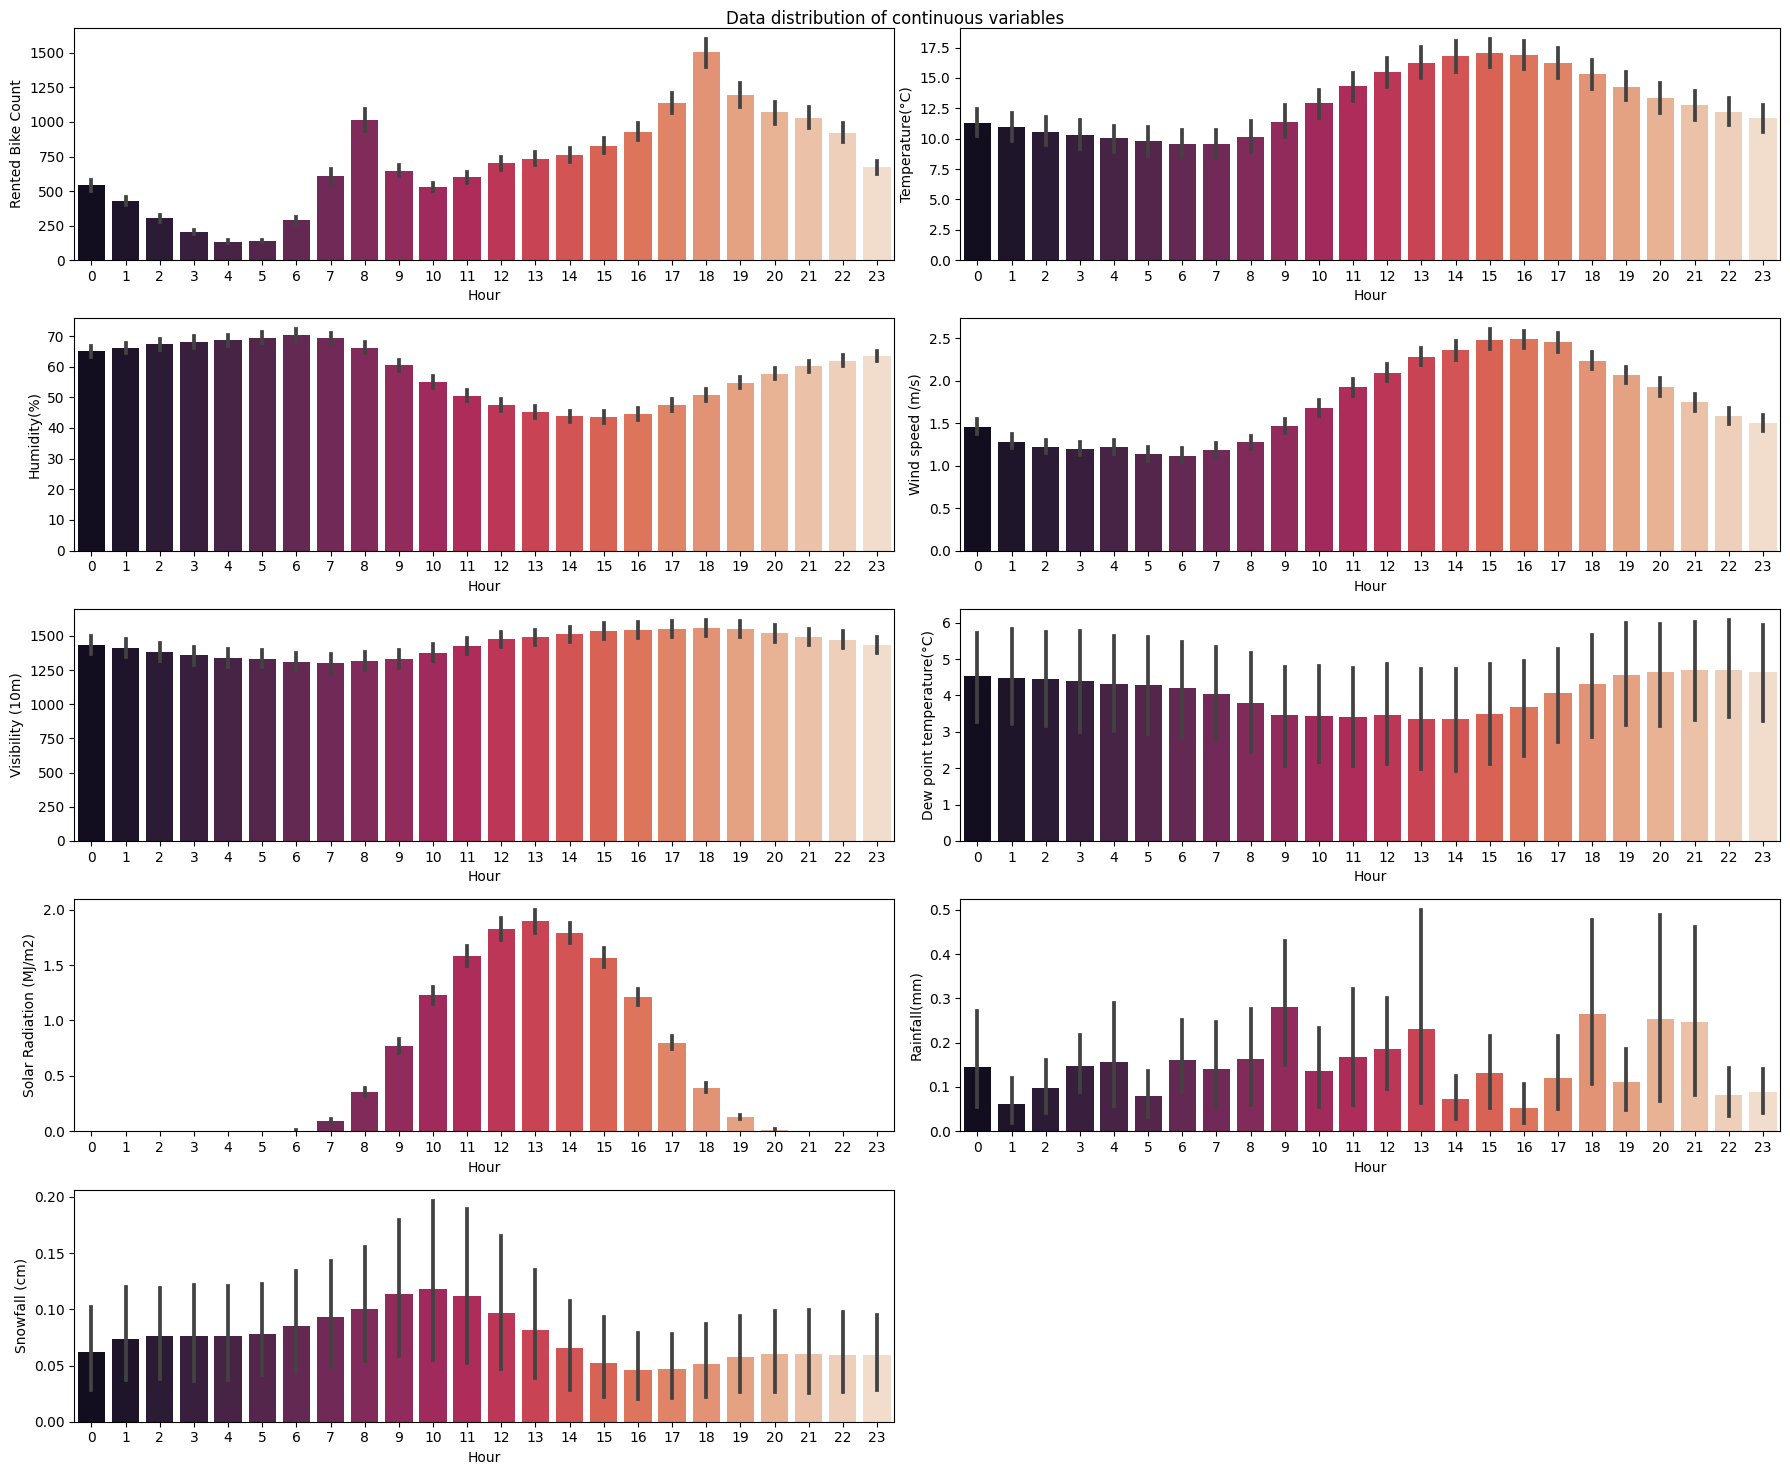

In [ ]:
#biểu đồ theo thời gian từng biến
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax, palette = 'rocket')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

**Comment:** Lượng thuê xe cao điểm vào 18h, đây cũng là lúc sau thời điểm nhiệt độ cao nhất trong ngày, lúc này nhiệt độ đã giảm và trời đã hết nắng gắt (Solar Radiation thấp) nên có thể dự đoán rằng đây là lúc thời tiết mát mẻ và dễ chịu nên số lượng thuê xe cao nhất trong ngày

Những pie chart bên dưới chứng tỏ rằng dữ liệu cân bằng (balanced)

In [ ]:
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
season_var

col_0,% observations
Seasons,
Autumn,2184
Spring,2208
Summer,2208
Winter,2160


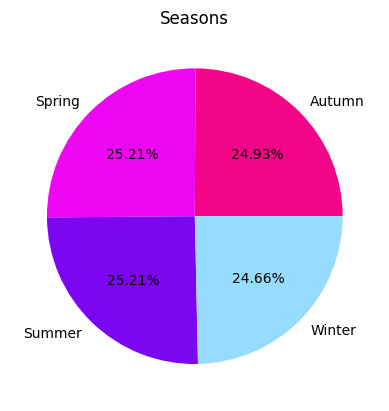

In [ ]:
#pie chart của season
a = ['#F20587','#EE05F2','#7C05F2','#95DCFF']
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.2f%%', colors = a)
plt.title('Seasons')
plt.show()

Số lượng dữ liệu các mùa đều nhau chứng tỏ dữ liệu được thu thập đủ qua 4 mùa

Text(0.5, 1.0, 'Rented Bike Count in Seasons')

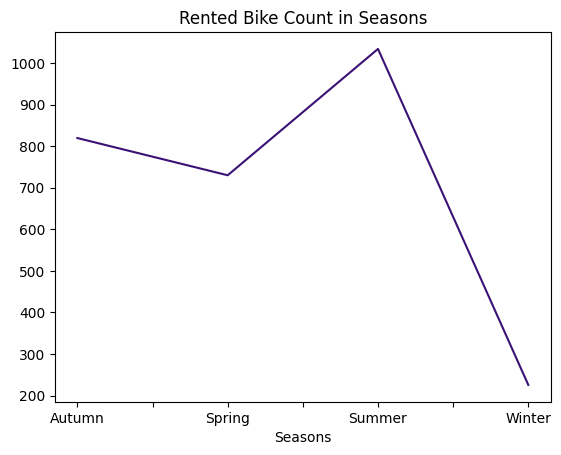

In [ ]:
groupby_seasons=df.copy()
groupby_seasons.groupby('Seasons').mean()['Rented Bike Count'].plot.line(color='#3A1175')
plt.title('Rented Bike Count in Seasons')

**Comment:** Lượng xe đạp được thuê tăng cao vào mùa hạ và giảm vào mùa đông. Do đó có thể nhận định rằng mọi người có xu hướng ra ngoài bằng xe đạp vào mùa hạ do thời tiết nóng hơn là mùa đông trong thời tiết lạnh

In [ ]:
df['Functioning Day'].value_counts().to_frame()

,Functioning Day
Yes,8465
No,295


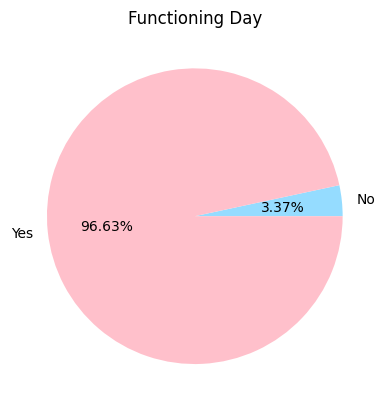

In [ ]:
#pie chart của functioning day

Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.2f%%', colors = ['#95DCFF','pink'])
plt.title('Functioning Day')
plt.show()

In [ ]:
groupby_fd=df.copy()
fd = pd.DataFrame(groupby_holiday.groupby('Functioning Day')['Rented Bike Count'].mean().sort_values(ascending=False))
fd.style.background_gradient(cmap=sns.light_palette('pink',as_cmap=True))

,Rented Bike Count
Functioning Day,
Yes,729.156999
No,0.000000


In [ ]:
df['Holiday'].value_counts().to_frame()

,Holiday
No Holiday,8328
Holiday,432


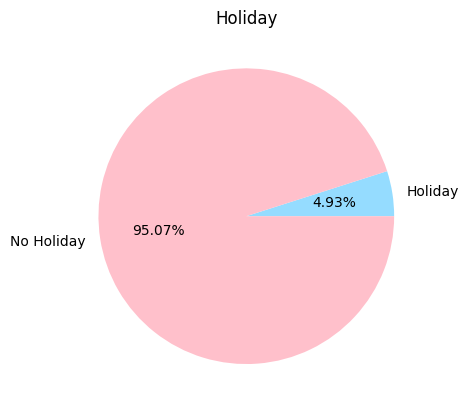

In [ ]:
#pie chart của holiday
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.2f%%',colors = ['#95DCFF','pink'])
plt.title('Holiday')
plt.show()

In [ ]:
groupby_holiday=df.copy()
holiday1 = pd.DataFrame(groupby_holiday.groupby('Holiday')['Rented Bike Count'].mean().sort_values(ascending=False))
holiday1.style.background_gradient(cmap=sns.light_palette('pink',as_cmap=True))

,Rented Bike Count
Holiday,
No Holiday,715.228026
Holiday,499.756944


Text(0.5, 1.0, 'Rented Bike Count in Holiday')

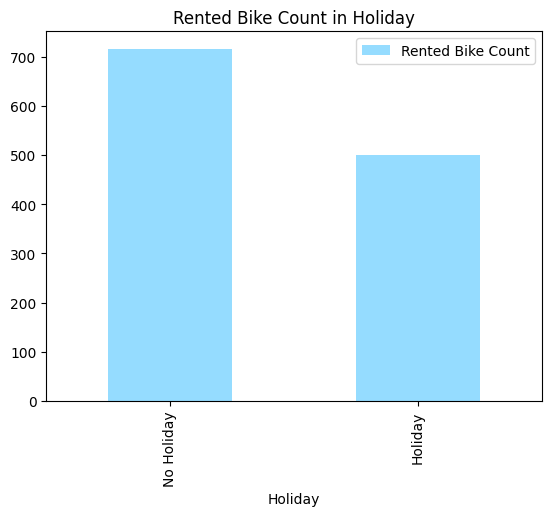

In [ ]:
holiday1.plot.bar(color = ['#95DCFF','pink'])
plt.title('Rented Bike Count in Holiday')

**Comment**: Lượng thuê xe ngày thường cao hơn ngày nghỉ lễ có thể là do mọi người không thích ra ngoài ngày lễ và muốn tận hưởng ngày nghỉ lễ bên cạnh bạn bè, người thân.

## **Reduce Outliers**

Ở phần tiếp theo nhóm sử dụng boxplot để biểu thị từng biến và xác định outlier để có cách xử lý phù hợp ở các bước tiếp theo

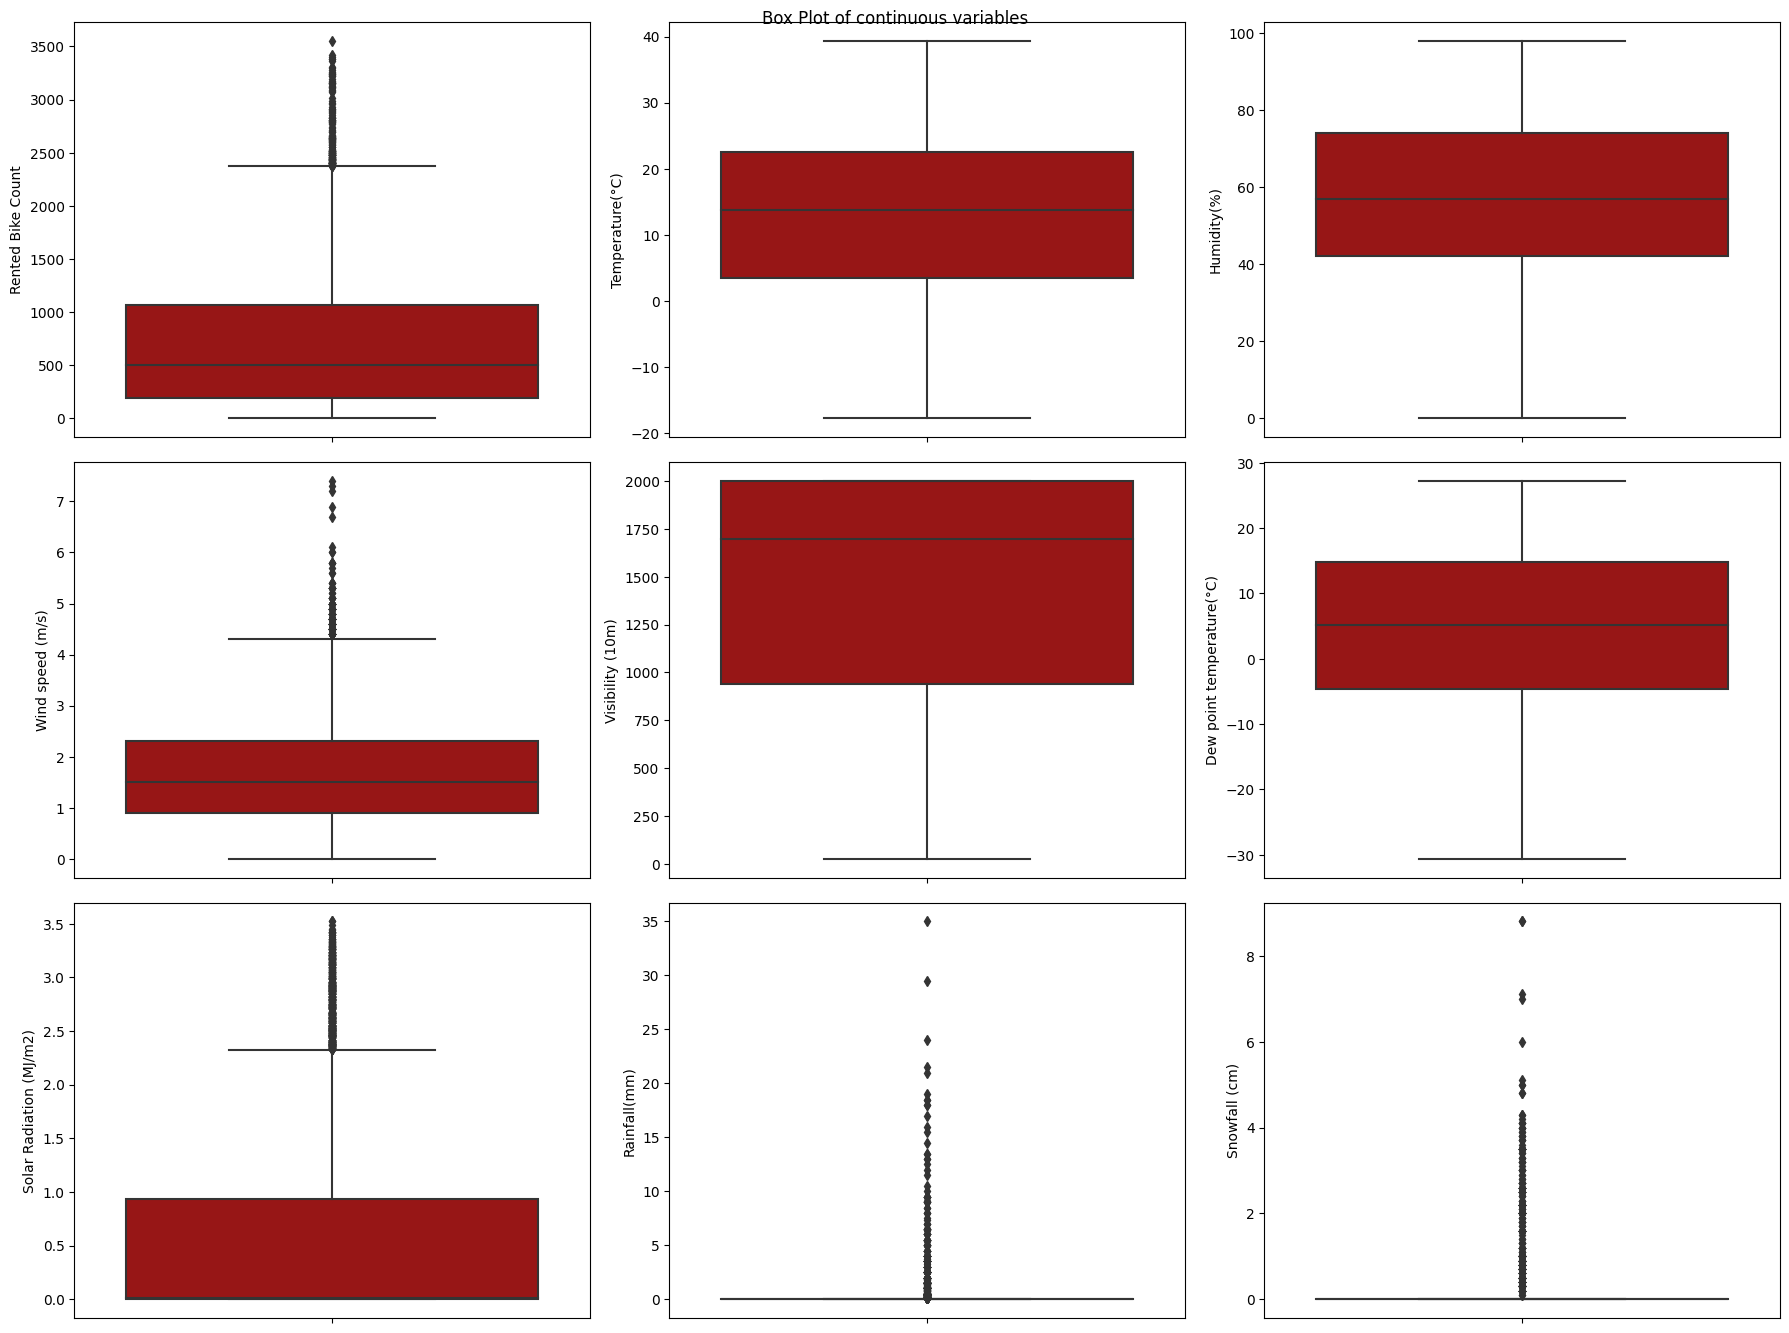

In [ ]:
#box plot của các biến
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_sharing.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=bike_sharing, y=col, ax=ax,color='#AC0000')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()
plt.show()

Định nghĩa hàm remove_outliers để loại bỏ các outlier

In [ ]:
def remove_outliers(df: pd.DataFrame, feat: str):
    """
    """
    feat_fraud = df[feat].values
    q25, q75 = np.percentile(feat_fraud, 25), np.percentile(feat_fraud, 75)
    iqr = q75 -q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in feat_fraud if x < lower or x > upper]
    print(f'Feature {feat} Outliers for Fraud Cases: {len(outliers)}')

    return df.drop(df[(bike_sharing[feat] > upper) | (df[feat] < lower)].index)

In [ ]:
for i in bike_sharing.select_dtypes(include=['float64','int64']).columns:
  bike_sharing=remove_outliers(bike_sharing,i)

Feature Rented Bike Count Outliers for Fraud Cases: 158
Feature Temperature(°C) Outliers for Fraud Cases: 0
Feature Humidity(%) Outliers for Fraud Cases: 0
Feature Wind speed (m/s) Outliers for Fraud Cases: 161
Feature Visibility (10m) Outliers for Fraud Cases: 0
Feature Dew point temperature(°C) Outliers for Fraud Cases: 0
Feature Solar Radiation (MJ/m2) Outliers for Fraud Cases: 681
Feature Rainfall(mm) Outliers for Fraud Cases: 512
Feature Snowfall (cm) Outliers for Fraud Cases: 398


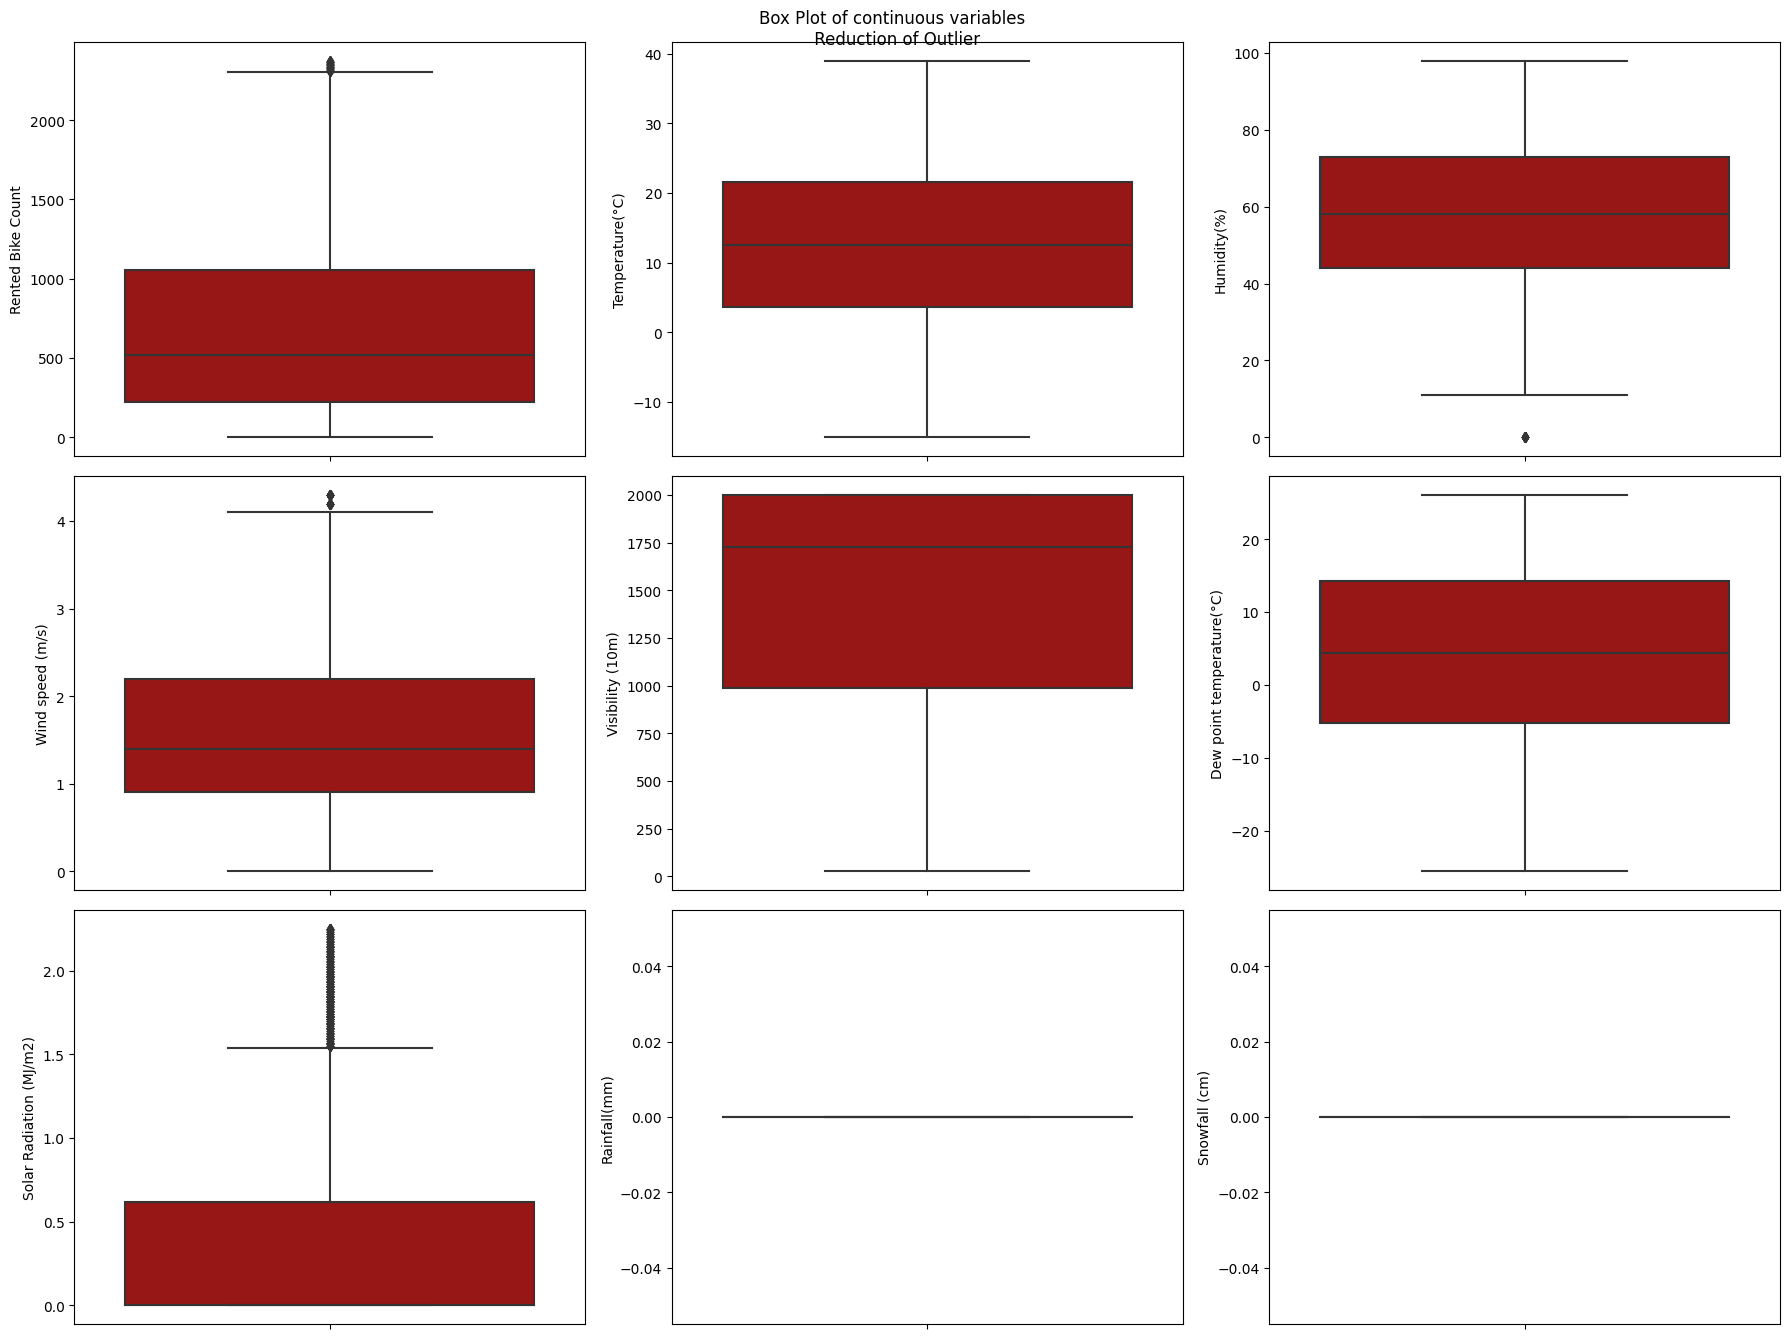

In [ ]:
#box plot của các biến sau khi đã lọc outlier
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_sharing.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=bike_sharing, y=col, ax=ax,color='#AC0000')
plt.suptitle('Box Plot of continuous variables \n Reduction of Outlier')
plt.tight_layout()
plt.show()

## **Identify important variable**

Tại phần này nhóm xác định biến quan trọng bằng chỉ số The Pearson Correlation Coefficient và P-value

In [ ]:
bike_sharing.shape[1]

18

In [ ]:
for i in range(2,18):
    pearson_coef, p_value = stats.pearsonr(bike_eda[bike_eda.columns[i]], bike_eda['Rented Bike Count'])
    print(f"The Pearson Correlation Coefficient - {bike_eda.columns[i]} is", pearson_coef, " with a P-value of P =", p_value,
          '\n', '---------')

The Pearson Correlation Coefficient - Hour is 0.42807018328197183  with a P-value of P = 2.2716756511592417e-303 
 ---------
The Pearson Correlation Coefficient - Temperature(°C) is 0.5570934161995496  with a P-value of P = 0.0 
 ---------
The Pearson Correlation Coefficient - Humidity(%) is -0.08054505912239858  with a P-value of P = 2.4568354835370756e-11 
 ---------
The Pearson Correlation Coefficient - Wind speed (m/s) is 0.12453553488556443  with a P-value of P = 4.3832514704279945e-25 
 ---------
The Pearson Correlation Coefficient - Visibility (10m) is 0.1351573621392546  with a P-value of P = 2.7198781224152047e-29 
 ---------
The Pearson Correlation Coefficient - Dew point temperature(°C) is 0.43070101348795203  with a P-value of P = 1.7164698598042998e-307 
 ---------
The Pearson Correlation Coefficient - Solar Radiation (MJ/m2) is 0.2260288139544993  with a P-value of P = 4.4546887611880166e-80 
 ---------
The Pearson Correlation Coefficient - Rainfall(mm) is nan  with a P-v

Các biến có chỉ số Correlation không gần 0 và có P-value < 0.05 nên các biến đều quan trọng và nhóm sử dụng tất cả các biến để phát triển model vì không muốn bỏ xót biến khiến mô hình trở nên không chính xác

# **Model Development**

1. Nhóm 5 sử dụng hàm train_test_split để chia dữ liệu thành tập train1 và test ban đầu để thực hiện chuẩn hóa dữ liệu trên từng phần một.

2. Tiếp theo, nhóm sử dụng lại hàm train_test_split để chia tập train1 thành tập train và validation, với tỷ lệ 75% cho train và 25% cho validation trong 80% ban đầu.
<br>
- Train1: 0.8 (=Train + Eval)

- Train: 0.8 * 0.75 = 0.6

- Val: 0.8 * 0.25 = 0.2

- Test: 0.2
<br>
3. Sau đó, nhóm khởi tạo một mô hình và sử dụng phương thức fit để huấn luyện mô hình trên tập train.
4. Tunning:
- Đánh giá mô hình trên tập val sử dụng RMSE làm thang đo và chọn hyperpagram tốt nhất.
- RMSE (Root Mean Square Error) là một độ đo lỗi phổ biến được sử dụng để đánh giá mô hình dự báo. Nó đo lường khoảng cách trung bình giữa giá trị dự báo và giá trị thực tế. RMSE được tính bằng cách lấy căn bậc hai của trung bình của các lỗi bình phương.
5. Lựa chọn mô hình
6. Huấn luyện lại trên tập train1 (=Train + Val)
7. Đánh giá mô hình cuối cùng trên tập test



## **Data Normalization**

Nhận thấy range các giá trị của các cột không đồng đều. Ở đây, nhóm thực hiện vẽ các biểu đồ biểu diễn phẩn bổ các giá trị của từng cột. Mục đích của việc vẽ biểu đồ này là xem xét phân bổ, từ đó chọn phương thức chuẩn hoá phù hợp

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>],
       [<Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

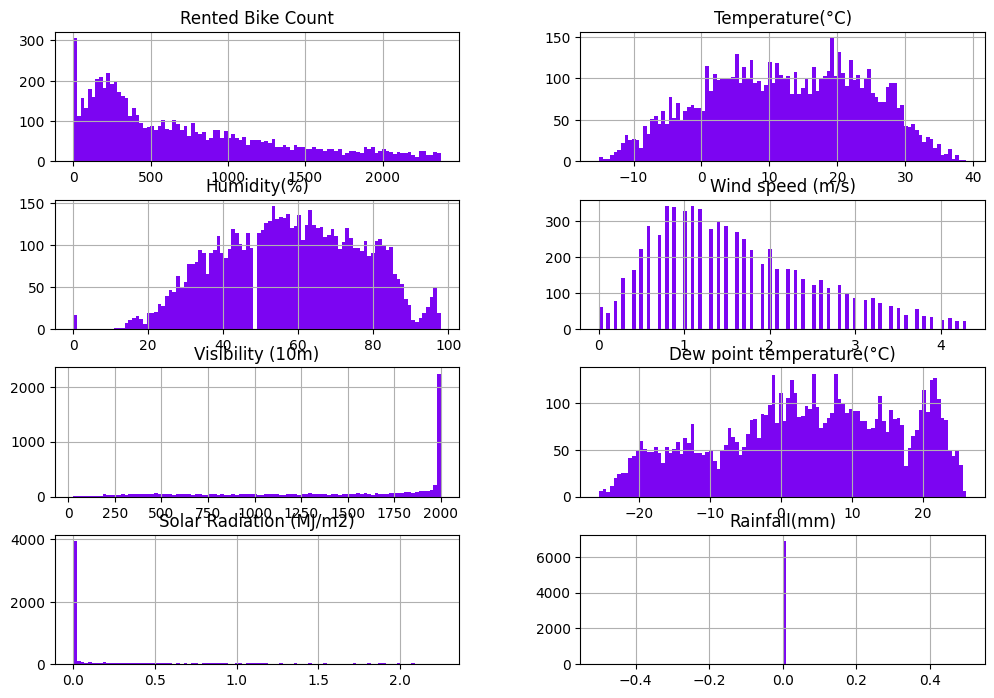

In [ ]:
bike_sharing[columns[1:10]].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2), color = '#7C05F2')

In [ ]:
# Lấy ra dữ liệu numeric để thực hiện normalize:
X=bike_sharing.iloc[:,2:11]
y=bike_sharing.iloc[:,1]

# Chia dữ liệu thành tập train và test ban đầu
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Với các biểu đồ ở trên, nhóm quyết định chuẩn hoá bằng phương pháp Min-Max. Ở đây, nhóm tạo function và thực hiện chuẩn hoá với các cột từ cột 3 đến cột 11.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# tạo bộ scaler
scaler = MinMaxScaler()
# fit scaler vào data
scaler.fit(X_train1)
# Thực hiện scale
normalized = scaler.transform(X_train1)
normalized1 = scaler.transform(X_test)

Cuối cùng, nhóm thực hiện join các cột biến X đã được chuẩn hóa và các cột biến X đã sử dụng dummy ở phần Formatting

In [ ]:
X_train2 = X_train1.join(bike_sharing.iloc[:,11:18])


In [ ]:
X_train2

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
358,22,-0.1,49,2.0,870,-9.5,0.00,0.0,0.0,0,0,0,1,1,0,1
364,4,-5.0,70,2.7,702,-9.6,0.00,0.0,0.0,0,0,0,1,1,0,1
5186,2,23.6,80,1.5,879,19.9,0.00,0.0,0.0,0,0,1,0,1,0,1
4083,3,13.5,41,1.0,2000,0.4,0.00,0.0,0.0,0,1,0,0,1,0,1
3821,5,9.5,65,0.9,2000,3.2,0.00,0.0,0.0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,23,27.2,55,0.7,920,17.3,0.00,0.0,0.0,0,0,1,0,1,0,1
6844,4,18.0,59,1.5,2000,9.8,0.00,0.0,0.0,1,0,0,0,1,0,1
6888,0,22.1,74,1.1,1962,17.2,0.00,0.0,0.0,1,0,0,0,1,0,1
7088,8,18.2,86,0.0,858,15.8,0.48,0.0,0.0,1,0,0,0,1,0,1


In [ ]:
X_test1 = X_test.join(bike_sharing.iloc[:,11:18])

In [ ]:
X_test1

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
1262,14,3.3,73,0.4,744,-1.0,0.11,0.0,0.0,0,0,0,1,1,0,1
2400,0,5.1,77,1.9,718,1.3,0.00,0.0,0.0,0,1,0,0,1,0,1
7037,5,19.5,74,1.8,1421,14.7,0.00,0.0,0.0,1,0,0,0,1,0,1
8018,2,6.4,65,0.0,2000,0.2,0.00,0.0,0.0,1,0,0,0,1,0,1
2945,17,22.0,49,3.7,1582,10.7,1.28,0.0,0.0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,23,10.2,58,2.4,2000,2.2,0.00,0.0,0.0,0,1,0,0,1,0,1
835,19,-2.7,39,1.4,1616,-14.7,0.00,0.0,0.0,0,0,0,1,1,0,1
4445,5,19.2,56,0.9,1772,10.2,0.00,0.0,0.0,0,0,1,0,1,0,1
4809,9,22.4,62,0.9,761,14.7,0.93,0.0,0.0,0,0,1,0,1,0,1


*Tạo 1 dictionary có value là các chỉ số để so sánh các model*

In [ ]:
model_comparison = {}

## **Linear Regression**

In [ ]:
# Chia tập train1 thành tập train và validation
X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train1, test_size=0.25, random_state=42)

In [ ]:
# Tạo mô hình Linear Regression
model0 = LinearRegression()

# Fit mô hình vào tập train
model0.fit(X_train, y_train)

y_pred1 = model0.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred1)),4))

rmse default 416.9789


In [ ]:
model0.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

- copy_X: If copy_X=True, the input X matrix will be copied before the linear regression model is fit. This can be useful if the input X matrix is large, as it can prevent the model from modifying the original data. However, copying the X matrix can be expensive, so it is not always necessary.
- fit_intercept: If fit_intercept=True, the linear regression model will fit an intercept term. The intercept term is a constant term that is added to the model's predictions. This can be useful if the data has a mean that is not zero. However, fitting an intercept term can make the model more sensitive to noise in the data.
- n_jobs: The n_jobs parameter specifies the number of jobs to use for the computation. If n_jobs=1, the computation will be performed on a single core. If n_jobs=-1, all available CPUs will be used for the computation. Using more jobs can improve performance, but it can also increase the memory usage.
- positive: If positive=True, the coefficients of the linear regression model will be constrained to be positive. This can be useful for some applications, such as portfolio optimization. However, it can also make the model less flexible.

- Nhóm sử dụng GridSearchCV để thực hiện Grid Search với cross-validation. Đầu tiên, nhóm định nghĩa mô hình Linear Regression (model1) và định nghĩa một grid (param_grid) với các giá trị siêu tham số cần tìm. Trong trường hợp này, chúng ta tìm các giá trị fit_intercept (True/False).

- Sau đó, nhóm tạo một đối tượng GridSearchCV với mô hình, grid và các thông số khác như số lượng fold trong cross-validation (cv) và phương thức đánh giá (scoring). Tiếp theo, nhóm gọi phương thức fit trên GridSearchCV để thực hiện tìm kiếm siêu tham số tốt nhất.

- Tiếp tục, nhóm in ra siêu tham số tốt nhất (best_params_) và điểm RMSE tốt nhất (best_score_).

In [ ]:
# Định nghĩa grid search với các giá trị siêu tham số cần tìm
param_grid = {'fit_intercept': [True, False]}

# Thực hiện grid search với cross-validation trên tập train
grid_search = GridSearchCV(model0, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

Best Parameters: {'fit_intercept': True}
Best RMSE Score: 387.4068


Ở đây, chúng ta thấy "Best Parameters: {'fit_intercept': False}", siêu tham số tốt nhất cho mô hình Linear Regression là fit_intercept=False. Điều này có nghĩa là mô hình được đào tạo không cần học hệ số điều chỉnh và giả định rằng đường hồi quy đi qua gốc tọa độ.

**Tiếp theo**, sau khi tìm thấy siêu tham số tốt nhất từ Grid Search (cụ thể ở đây: fit_intercept=False), chúng ta tạo mô hình Linear Regression với giá trị siêu tham số đó bằng cách truyền nó vào khi khởi tạo mô hình (LinearRegression(fit_intercept=False)).

Sau đó, chúng ta sử dụng phương thức fit() để fit lại mô hình vào tập huấn luyện (X_train và y_train).

In [ ]:
# Tạo mô hình Linear Regression với siêu tham số tốt nhất
model1 = LinearRegression(fit_intercept=False)

# Fit mô hình vào tập huấn luyện
model1.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

**Cuối cùng**, chúng ta đánh giá mô hình trên tập validation bằng cách tính toán Mean Squared Error (mean_squared_error).

In [ ]:
# Đánh giá trên tập validation
y_val_pred = model1.predict(X_val)
val_rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 4)
val_r2 = r2_score(y_val,y_val_pred)
print("Root Mean Squared Error on validation set:", val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Linear Regression']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 416.9789
RMSE on validation set: 0.5633133503835859


## **Polynomial Regression**

Chúng ta sử dụng hàm PolynomialFeatures từ module scikit-learn để chuyển đổi đầu vào X_train thành ma trận đa thức X_poly_train. Tương tự với tập validation. Bậc của đa thức được xác định bởi biến degree. Sau đó, chúng ta khởi tạo mô hình LinearRegression và sử dụng phương thức fit để phù hợp với dữ liệu X_poly và y. Mô hình Polynomial Regression đã được khởi tạo và phù hợp với dữ liệu.

In [ ]:
# Khởi tạo mô hình Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train, y_train)
X_val_poly = poly_features.transform(X_val)

# Phù hợp với mô hình Polynomial Regression
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

**Tương tự như model Linear Regression**, nhóm 5 sử dụng GridSearchCV để tìm ra siêu tham số, sau đó, nhóm in ra siêu tham số tốt nhất (best_params_) và điểm R^2 tốt nhất (best_score_)

In [ ]:
# Thực hiện grid search với cross-validation trên tập train
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

Best Parameters: {'fit_intercept': True}
Best RMSE Score: 387.4068


**Tiếp theo**, sau khi tìm thấy siêu tham số tốt nhất từ Grid Search (cụ thể ở đây: fit_intercept=False), chúng ta tạo mô hình Linear Regression với giá trị siêu tham số đó bằng cách truyền nó vào khi khởi tạo mô hình (LinearRegression(fit_intercept=False)).

In [ ]:
# Tạo mô hình Linear Regression với siêu tham số tốt nhất
model3 = LinearRegression(fit_intercept=False)

# Fit mô hình vào tập huấn luyện
model3.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

**Cuối cùng**, chúng ta đánh giá mô hình trên tập validation bằng cách tính toán Mean Squared Error (mean_squared_error).

In [ ]:
# Đánh giá trên tập validation
y_val_pred = model3.predict(X_val_poly)
val_rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 4)
val_r2 = r2_score(y_val,y_val_pred)
print("Root Mean Squared Error on validation set:", val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Polynomial Regression']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 345.0531
RMSE on validation set: 0.7009708292036766


## **Decision Tree Regression**




In [ ]:
# khởi tạo mô hình decision tree regression
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, y_train)

y_pred2 = dtr.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred2)),4))

rmse default 323.1943


In [ ]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

- ccp_alpha: A non-negative float that controls the complexity of the decision tree. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- criterion: A string that specifies the splitting criterion to use. The possible values are "gini" and "entropy".
- max_depth: An integer that specifies the maximum depth of the decision tree. A higher value will lead to a more complex tree, while a lower value will lead to a simpler tree.
- max_features: An integer or float that specifies the maximum number of features to consider when splitting a node. A higher value will lead to a more complex tree, while a lower value will lead to a simpler tree.
- max_leaf_nodes: An integer that specifies the maximum number of leaf nodes in the decision tree. A higher value will lead to a more complex tree, while a lower value will lead to a simpler tree.
- min_impurity_decrease: A non-negative float that specifies the minimum decrease in impurity required to split a node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- min_samples_leaf: An integer that specifies the minimum number of samples required in a leaf node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- min_samples_split: An integer that specifies the minimum number of samples required to split a node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- min_weight_fraction_leaf: A non-negative float that specifies the minimum fraction of the sum of the weights of the samples in a leaf node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- random_state: An integer that specifies the random seed to use. This can be used to ensure that the results are reproducible.
- splitter: A string that specifies the splitting algorithm to use. The possible values are "best" and "random".

In [ ]:
# taọ 1 dict với key là tên hyperparam, value là các giá trị thử
params = {"splitter":["best","random"],
          "max_depth" : range(1,15),
          'min_samples_split': range(2, 21),
          "min_samples_leaf":range(1,20),
          "max_features":["auto","log2","sqrt",None],
          'min_weight_fraction_leaf': np.arange(0, 0.6, 0.1),
          "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
          'random_state': [42],
          'min_impurity_decrease': np.arange(0,0.1, 0.01)}
# tạo grid search
random_dtr = RandomizedSearchCV(dtr, params,n_iter = 60, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
# fit vào model
random_dtr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=60,
                   param_distributions={'max_depth': range(1, 15),
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(2, 21),
                                        'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'random_state': [42],
                                        'splitter': ['best', 'random']},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
# In hyperparam tốt nhất
print("Best Parameters:", random_dtr.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(random_dtr.best_score_.round(4)))

Best Parameters: {'splitter': 'best', 'random_state': 42, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 9, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.06, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 12}
Best RMSE Score: 288.6282


In [ ]:
# Train lại với tập train và đánh giá trên tập validation
tuned_dtr = DecisionTreeRegressor(splitter= 'best', random_state = 42, min_weight_fraction_leaf = 0.0, min_samples_split = 17, min_samples_leaf = 10, min_impurity_decrease = 0.08, max_leaf_nodes = 90, max_features = 'log2', max_depth = 13)
tuned_dtr.fit(X_train, y_train)
tuned_y_pred = tuned_dtr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, tuned_y_pred)),4)
val_r2 = r2_score(y_val,tuned_y_pred)

print('Root Mean Squared Error on validation set:', val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Decision Tree Regressor']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 302.4833
RMSE on validation set: 0.7702029532127306


## **Random Forest Regressor**

In [ ]:
# khởi tạo mô hình
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

y_pred3 = rfr.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred3)),4))

rmse default 231.0498


In [ ]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

- bootstrap: A boolean that specifies whether to use bootstrapping. If True, then each tree in the forest is trained on a bootstrap sample of the training data. If False, then each tree is trained on the entire training data.
- ccp_alpha: A non-negative float that controls the complexity of the decision trees in the forest. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- criterion: A string that specifies the splitting criterion to use. The possible values are "gini" and "entropy".
- max_depth: An integer that specifies the maximum depth of the decision trees in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- max_features: An integer or float that specifies the maximum number of features to consider when splitting a node in a decision tree. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- max_leaf_nodes: An integer that specifies the maximum number of leaf nodes in the decision trees in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- max_samples: An integer that specifies the maximum number of samples to use when training each decision tree in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- min_impurity_decrease: A non-negative float that specifies the minimum decrease in impurity required to split a node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- min_samples_leaf: An integer that specifies the minimum number of samples required in a leaf node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- min_samples_split: An integer that specifies the minimum number of samples required to split a node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- min_weight_fraction_leaf: A non-negative float that specifies the minimum fraction of the sum of the weights of the samples in a leaf node. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- n_estimators: An integer that specifies the number of decision trees in the forest. A higher value will lead to a more complex model, while a lower value will lead to a simpler model.
- n_jobs: An integer that specifies the number of jobs to use for training the decision trees in parallel. A value of -1 will use all available cores.
oob_score: A boolean that specifies whether to calculate the out-of-bag score. If True, then the out-of-bag score will be calculated and stored in the forest object.
- random_state: An integer that specifies the random seed to use. This can be used to ensure that the results are reproducible.
- verbose: An integer that specifies the verbosity level. A value of 0 will suppress all output, while a value of 1 will print the progress of the algorithm.
- warm_start: A boolean that specifies whether to warm-start the training process. If True, then the previous forest will be used as a starting point for the new forest.

In [ ]:
# tạo grid search để tìm hyperparameters tốt nhất
params = {'n_estimators': np.arange(50, 500, 50, dtype=np.int32),
          "max_features": ["auto", "sqrt", "log2"],
          "max_depth": [None] + list(np.arange(5, 50, 5)),
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 1),
          'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
          'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30],
          'max_samples': [None, 0.5, 0.8],
          'min_impurity_decrease': np.arange(0, 0.1, 0.01),
          'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_jobs': [-1],
          'oob_score': [True, False],
          'random_state': [42],
          'warm_start': [True, False]}
random_rfr = RandomizedSearchCV(rfr, params, n_iter = 60, cv=5, scoring = 'neg_root_mean_squared_error', verbose = 1)
random_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=60,
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 5, 10, 15, 20,
                                                           25, 30],
                                        'max_samples': [None, 0.5, 0.8],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06...
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450], dtype=int32),
                                        'n_jobs': [-1],
                                        'oob_score': [True, False],
                                        'random_state': [42],
                                        'warm_start': [True, False]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
# In hyperparam tốt nhất
print("Best Parameters:", random_rfr.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(random_rfr.best_score_.round(4)))

Best Parameters: {'warm_start': True, 'random_state': 42, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 16, 'min_samples_leaf': 18, 'min_impurity_decrease': 0.09, 'max_samples': None, 'max_leaf_nodes': 30, 'max_features': 'auto', 'max_depth': 20, 'ccp_alpha': 0.0}
Best RMSE Score: 274.5215


In [ ]:
# Train lại với tập train và test trên tập validation
tuned_rfr = RandomForestRegressor(warm_start = True, random_state = 42, oob_score = True, n_jobs = -1, n_estimators = 350,min_weight_fraction_leaf = 0.0, min_samples_split = 2, min_samples_leaf = 12, min_impurity_decrease = 0.08, max_samples = None, max_leaf_nodes = 25, max_features = 'log2', max_depth = 15, ccp_alpha = 0.1)
tuned_rfr.fit(X_train, y_train)
tuned_y_pred = tuned_rfr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, tuned_y_pred)),4)
val_r2 = r2_score(y_val,tuned_y_pred)

print('rmse on validation set', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Random Forest Regressor']=[val_rmse, val_r2]

rmse on validation set 314.568
r2 on validation set 0.7514745933254233


## **Bagging Regressor**
- Bagging: Xây dựng một lượng lớn các model (thường là cùng loại) trên những subsamples khác nhau từ tập training dataset (random sample trong 1 dataset để tạo 1 dataset mới). Những model này sẽ được train độc lập và song song với nhau nhưng đầu ra của chúng sẽ được trung bình cộng để cho ra kết quả cuối cùng.

- Như chúng ta đã biết thì Random forests là một tổ hợp của nhiều Decision Tree. Với kỹ thuật kết hợp (Ensemble learning) ở đây, nhóm 5 lấy Random Forest Regressor (đã được tunning) ở trên làm base model cho thuật toán kết hợp n model. Như vậy Bagging Regressor ở đây là một tổ hợp của nhiều Random Forest Regressor


In [ ]:
# khởi tạo mô hình
bgr= BaggingRegressor(tuned_rfr)
bgr.fit(X_train, y_train)
y_pred4 = bgr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, y_pred4)),4)
val_r2 = r2_score(y_val,y_pred4)

print('rmse default', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Bagging Regressor']=[val_rmse, val_r2]

rmse default 316.9138
r2 on validation set 0.7477541038579175


## Stacking Regressor
- Stacking hay tên đầy đủ là Stacked Generalization là một thuật toán học máy thuộc Ensemble Learning. Tương tự như Bagging và Boosting, Stacking cũng kết hợp các dự đoán từ nhiều mô hình học máy trên cùng một tập dữ liệu.

- Khác với Bagging, Stacking sử dụng nhiều mô hình học máy khác nhau chứ không chỉ là Decision Tree hay RandomForest.

- Ở đây Stacking Regressor nhóm 5 sử dụng là tổ hợp của tất cả các mô hình (đã được tunning) phía trên là Linear Regression, Decision Tree Regression, Polynomial Regression, Random Forest Regression và Bagging Regression.

In [ ]:
combine = [('linear regression',model1),
            ('decision Tree',tuned_dtr),
            ('random forest',tuned_rfr),
            ('bagging',bgr)]

In [ ]:
str=StackingRegressor(estimators = combine)
str.fit(X_train, y_train)
y_pred5 = str.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, y_pred5)),4)
val_r2 = r2_score(y_val,y_pred5)

print('rmse default', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Stacking Regressor1']=[val_rmse, val_r2]

rmse default 281.2799
r2 on validation set 0.8012903625317285


In [ ]:
combine2 = [('linear regression',model1),
            ('polynomial regression',model3),
            ('decision Tree',tuned_dtr),
            ('random forest',tuned_rfr),
            ('bagging',bgr)]

In [ ]:
str2=StackingRegressor(estimators = combine2)
str2.fit(X_train, y_train)
y_pred6 = str.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, y_pred6)),4)
val_r2 = r2_score(y_val,y_pred6)

print('rmse default', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Stacking Regressor2']=[val_rmse, val_r2]

rmse default 281.2799
r2 on validation set 0.8012903625317285


# **Model Comparison**

In [ ]:
#Tạo Dataframe là bảng các chỉ số RMSE của tât cả các mô hình sau khi đã tune
model_com_df=pd.DataFrame(model_comparison).T
model_com_df.columns=['RMSE', 'R2']
model_com_df= model_com_df.sort_values(by='RMSE',ascending=False)
model_com_df.style.background_gradient(cmap='RdPu')

,RMSE,R2
Linear Regression,416.978900,0.563313
Polynomial Regression,345.053100,0.700971
Bagging Regressor,316.913800,0.747754
Random Forest Regressor,314.568000,0.751475
Decision Tree Regressor,302.483300,0.770203
Stacking Regressor1,281.279900,0.801290
Stacking Regressor2,281.279900,0.801290


Vậy, dựa theo kết quả trên, ta thấy Stacking regression có RMSE thấp nhất và R2 cao nhất. Vì vậy, nhóm lựa chọn mô hình Stacking Regression.

Tiếp theo, nhóm tiến hành chạy lại mô hình trên tập train+validation.

In [ ]:
str.fit(X_train2, y_train1)
y_predtest = str.predict(X_test1)

val_rmse = round(math.sqrt(mean_squared_error(y_test, y_predtest)),4)
val_r2 = r2_score(y_test, y_predtest)

print('rmse on test set', val_rmse)
print('r2 on test set', val_r2)

rmse on test set 277.9203
r2 on test set 0.7887707582363129


# **Conclusion**

Kết luận lại, nhóm đã phát triển mô hình Stacking Regressor để dự đoán Rented Bike Count

In [ ]:
import plotly.graph_objects as go
text = "<span style='font-size: 40px; color: fuchsia;'>  <b> ご清聴いただきありがとうございました。<br> <br> Thank you for listening. </span>"
fig = go.Figure()

# Add a text box to the figure
fig.add_trace(go.Scatter(x=[0], y=[0], mode='text', text=[text], textfont=dict(size=40)))
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=1200,
    height=400,
    plot_bgcolor='black'
)

# Create an animation frame with scrolling text
frames = []
for i in range(201):
    frame_data = [
        go.Scatter(x=[-i / 100, 1 - i / 100], y=[0, 0], mode='text', text=[text], textfont=dict(size=40, color='fuchsia'))
    ]
    frames.append(go.Frame(data=frame_data))

# Add the frames to the figure
fig.frames = frames

# Add a duplicate frame with the initial position of the text
frames.append(go.Frame(data=[go.Scatter(x=[0, 1], y=[0, 0], mode='text', text=[text], textfont=dict(size=40, color='fuchsia'))]))

# Create an infinite loop animation by specifying the frame sequence
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(label=' ▶', method='animate', args=[None, {'frame': {'duration': 10, 'redraw': False},
                                                                 'fromcurrent': True, 'transition': {'duration': 0},
                                                                 'mode': 'immediate'}]),
                dict(label=' II', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False},
                                                                    'mode': 'immediate',
                                                                    'transition': {'duration': 0}}])
            ]
        )
    ],
    sliders=[dict(
        steps=[dict(
            method="animate",
            args=[[i], {"frame": {"duration": 10, "redraw": False}, "mode": "immediate"}],
            label=str(i)
        ) for i in range(len(frames))]
    )]
)
fig.show()
